# Analysis of Weather in Adelaide and Mount Barker

We repeat analysis from the previous week on Mount Barker data and expand it by adding more data.

Data provided by: Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeal, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - 
Daily (GHCN-Daily), Version 3. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ 2015.

Website: http://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/locations/CITY:AS000001/detail

Included variables:
* DATE - date of recording in format year-month-date
* PRCP - Precipitation (mm)
* TMAX - Maximum temperature (degrees C). 
* TMIN - Minimum temperature (degrees C)
* STATION and NAME - weather station information

Your task is to load data stored in the files `MountBarkerWeather.csv` and `AdelaideWeather.csv`, join them together and then make sense of the data by using (mostly) Pandas functionality. For example, get descriptive statistics for temperatures and/or precipitation overall; compare the weather for different time periods; try to answer the question if there is a real climate change in South Australia. 

Also, use Python and Pandas to get a better understanding of the data itself: how long is the history of observations of precipitation and temperature (they are not the same); how many days covered, how many days missing.

Pandas was created for this type of work. This exercise is the best preparation for Assignment 2.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
mb = pd.read_csv('MountBarkerWeather.csv')
wa = pd.read_csv('AdelaideWeather.csv')

In [3]:
mb.head()

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,ASN00023733,"MOUNT BARKER, AS",1870-02-01,0.0,NaN,NaN
1,ASN00023733,"MOUNT BARKER, AS",1870-02-02,0.0,NaN,NaN
2,ASN00023733,"MOUNT BARKER, AS",1870-02-03,0.0,NaN,NaN
3,ASN00023733,"MOUNT BARKER, AS",1870-02-04,0.0,NaN,NaN
4,ASN00023733,"MOUNT BARKER, AS",1870-02-05,0.0,NaN,NaN


In [4]:
wa.head()

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,ASN00023026,"ADELAIDE POORAKA, AS",1878-01-01,0.0,NaN,NaN
1,ASN00023026,"ADELAIDE POORAKA, AS",1878-01-02,0.0,NaN,NaN
2,ASN00023026,"ADELAIDE POORAKA, AS",1878-01-03,0.0,NaN,NaN
3,ASN00023026,"ADELAIDE POORAKA, AS",1878-01-04,0.0,NaN,NaN
4,ASN00023026,"ADELAIDE POORAKA, AS",1878-01-05,0.0,NaN,NaN


In [5]:
mb.dtypes

STATION     object
NAME        object
DATE        object
PRCP       float64
TMAX       float64
TMIN       float64
dtype: object

In [6]:
wa.dtypes

STATION     object
NAME        object
DATE        object
PRCP       float64
TMAX       float64
TMIN       float64
dtype: object

In [7]:
# Convert the date column to a datetime column
mb['DATE'] = pd.to_datetime(mb['DATE'])
wa['DATE'] = pd.to_datetime(wa['DATE'])

In [8]:
# combine the two dataframes
weather = pd.concat([mb, wa], axis=0)
weather

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,ASN00023733,"MOUNT BARKER, AS",1870-02-01,0.0,NaN,NaN
1,ASN00023733,"MOUNT BARKER, AS",1870-02-02,0.0,NaN,NaN
2,ASN00023733,"MOUNT BARKER, AS",1870-02-03,0.0,NaN,NaN
3,ASN00023733,"MOUNT BARKER, AS",1870-02-04,0.0,NaN,NaN
4,ASN00023733,"MOUNT BARKER, AS",1870-02-05,0.0,NaN,NaN
...,...,...,...,...,...,...
73951,ASN00023034,"ADELAIDE AIRPORT, AS",2023-02-19,0.0,25.7,12.8
73952,ASN00023034,"ADELAIDE AIRPORT, AS",2023-02-20,0.0,34.3,15.0
73953,ASN00023034,"ADELAIDE AIRPORT, AS",2023-02-21,0.0,36.8,23.0
73954,ASN00023034,"ADELAIDE AIRPORT, AS",2023-02-22,0.0,35.5,21.9


In [9]:
# get the descriptive statistics for the dataframe
weather.describe()

,PRCP,TMAX,TMIN
count,123254.000000,48477.000000,48483.000000
mean,1.555987,20.909225,9.986779
std,4.478738,6.614374,4.796922
min,0.000000,6.700000,-5.600000
25%,0.000000,15.700000,6.700000
50%,0.000000,19.700000,9.800000
75%,0.800000,25.000000,12.900000
max,129.800000,45.800000,33.500000


In [10]:
weather.groupby('STATION').describe()

PRCP                                                    TMAX  \
               count      mean       std  min  25%  50%  75%    max    count   
STATION                                                                        
ASN00023026  48113.0  1.212870  3.781251  0.0  0.0  0.0  0.3   93.0      0.0   
ASN00023034  24828.0  1.202840  3.532637  0.0  0.0  0.0  0.5   85.6  24842.0   
ASN00023733  50313.0  2.058369  5.374283  0.0  0.0  0.0  1.3  129.8  23635.0   

                        ...                 TMIN                            \
                  mean  ...   75%   max    count       mean       std  min   
STATION                 ...                                                  
ASN00023026        NaN  ...   NaN   NaN      0.0        NaN       NaN  NaN   
ASN00023034  21.545029  ...  25.4  45.8  24837.0  11.499746  4.692536 -2.6   
ASN00023733  20.240952  ...  24.5  44.5  23646.0   8.397606  4.372853 -5.6   

                                    
             25%   50%   75%   max  
STATION                             
ASN00023026  NaN   NaN   NaN   NaN  
ASN00023034  8.2  11.2  14.4  33.5  
ASN00023733  5.5   8.3  11.1  28.6  

[3 rows x 24 columns]

In [11]:
weather.groupby('NAME').NAME.count()

NAME
ADELAIDE AIRPORT, AS    24845
ADELAIDE POORAKA, AS    49111
MOUNT BARKER, AS        50620
Name: NAME, dtype: int64

In [12]:
weather.groupby('NAME').TMAX.mean()

NAME
ADELAIDE AIRPORT, AS    21.545029
ADELAIDE POORAKA, AS          NaN
MOUNT BARKER, AS        20.240952
Name: TMAX, dtype: float64

In [13]:
temp = weather[weather.NAME == 'ADELAIDE POORAKA, AS']
temp

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,ASN00023026,"ADELAIDE POORAKA, AS",1878-01-01,0.0,NaN,NaN
1,ASN00023026,"ADELAIDE POORAKA, AS",1878-01-02,0.0,NaN,NaN
2,ASN00023026,"ADELAIDE POORAKA, AS",1878-01-03,0.0,NaN,NaN
3,ASN00023026,"ADELAIDE POORAKA, AS",1878-01-04,0.0,NaN,NaN
4,ASN00023026,"ADELAIDE POORAKA, AS",1878-01-05,0.0,NaN,NaN
...,...,...,...,...,...,...
49106,ASN00023026,"ADELAIDE POORAKA, AS",2023-01-25,0.0,NaN,NaN
49107,ASN00023026,"ADELAIDE POORAKA, AS",2023-01-26,0.0,NaN,NaN
49108,ASN00023026,"ADELAIDE POORAKA, AS",2023-01-27,0.0,NaN,NaN
49109,ASN00023026,"ADELAIDE POORAKA, AS",2023-01-30,NaN,NaN,NaN


In [14]:
# count null values
temp.isnull().sum()

STATION        0
NAME           0
DATE           0
PRCP         998
TMAX       49111
TMIN       49111
dtype: int64

In [15]:
weather.groupby('NAME').TMAX.mean().dropna().sort_values(ascending=False)

NAME
ADELAIDE AIRPORT, AS    21.545029
MOUNT BARKER, AS        20.240952
Name: TMAX, dtype: float64

In [16]:
# get a new year column
weather['YEAR'] = weather['DATE'].dt.year # get the year from the datetime column
weather

,STATION,NAME,DATE,PRCP,TMAX,TMIN,YEAR
0,ASN00023733,"MOUNT BARKER, AS",1870-02-01,0.0,NaN,NaN,1870
1,ASN00023733,"MOUNT BARKER, AS",1870-02-02,0.0,NaN,NaN,1870
2,ASN00023733,"MOUNT BARKER, AS",1870-02-03,0.0,NaN,NaN,1870
3,ASN00023733,"MOUNT BARKER, AS",1870-02-04,0.0,NaN,NaN,1870
4,ASN00023733,"MOUNT BARKER, AS",1870-02-05,0.0,NaN,NaN,1870
...,...,...,...,...,...,...,...
73951,ASN00023034,"ADELAIDE AIRPORT, AS",2023-02-19,0.0,25.7,12.8,2023
73952,ASN00023034,"ADELAIDE AIRPORT, AS",2023-02-20,0.0,34.3,15.0,2023
73953,ASN00023034,"ADELAIDE AIRPORT, AS",2023-02-21,0.0,36.8,23.0,2023
73954,ASN00023034,"ADELAIDE AIRPORT, AS",2023-02-22,0.0,35.5,21.9,2023


In [17]:
weather.groupby(['NAME','YEAR']).TMAX.mean().dropna() 
# group by name and year and get the mean of the TMAX column

NAME                  YEAR
ADELAIDE AIRPORT, AS  1955    19.624451
                      1956    20.181694
                      1957    20.945753
                      1958    20.395616
                      1959    21.558630
                                ...    
MOUNT BARKER, AS      2019    21.648246
                      2020    20.332955
                      2021    20.519048
                      2022    20.159475
                      2023    28.717241
Name: TMAX, Length: 136, dtype: float64

In [18]:
# get a new column for decade
weather['DECADE'] = weather['YEAR'] // 10 * 10
weather

,STATION,NAME,DATE,PRCP,TMAX,TMIN,YEAR,DECADE
0,ASN00023733,"MOUNT BARKER, AS",1870-02-01,0.0,NaN,NaN,1870,1870
1,ASN00023733,"MOUNT BARKER, AS",1870-02-02,0.0,NaN,NaN,1870,1870
2,ASN00023733,"MOUNT BARKER, AS",1870-02-03,0.0,NaN,NaN,1870,1870
3,ASN00023733,"MOUNT BARKER, AS",1870-02-04,0.0,NaN,NaN,1870,1870
4,ASN00023733,"MOUNT BARKER, AS",1870-02-05,0.0,NaN,NaN,1870,1870
...,...,...,...,...,...,...,...,...
73951,ASN00023034,"ADELAIDE AIRPORT, AS",2023-02-19,0.0,25.7,12.8,2023,2020
73952,ASN00023034,"ADELAIDE AIRPORT, AS",2023-02-20,0.0,34.3,15.0,2023,2020
73953,ASN00023034,"ADELAIDE AIRPORT, AS",2023-02-21,0.0,36.8,23.0,2023,2020
73954,ASN00023034,"ADELAIDE AIRPORT, AS",2023-02-22,0.0,35.5,21.9,2023,2020


(array([1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.,
        2030.]),
 [Text(1940.0, 0, '1940'),
  Text(1950.0, 0, '1950'),
  Text(1960.0, 0, '1960'),
  Text(1970.0, 0, '1970'),
  Text(1980.0, 0, '1980'),
  Text(1990.0, 0, '1990'),
  Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010'),
  Text(2020.0, 0, '2020'),
  Text(2030.0, 0, '2030')])

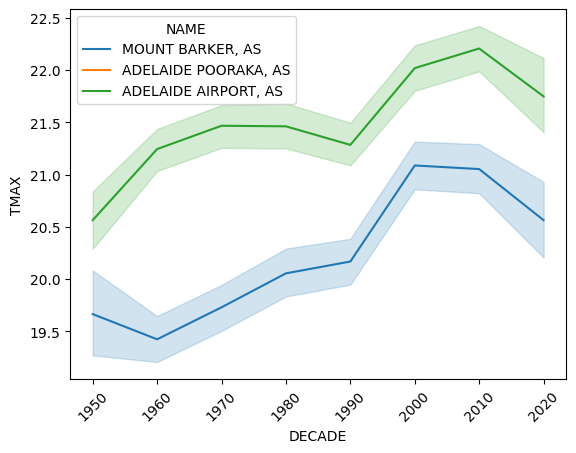

In [25]:
# plot a line graph of the mean temperature for each decade by location
weather = weather.reset_index()
sns.lineplot(x='DECADE', y='TMAX', hue='NAME', data=weather)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'MOUNT BARKER, AS'),
  Text(1, 0, 'ADELAIDE POORAKA, AS'),
  Text(2, 0, 'ADELAIDE AIRPORT, AS')])

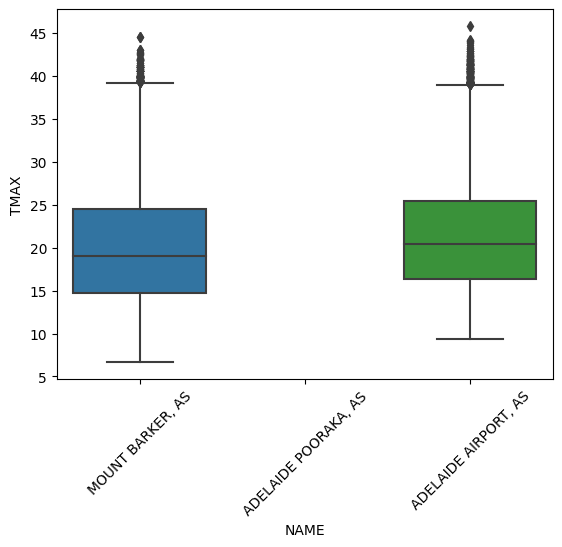

In [28]:
# plot a boxplot of the MAX temperature  by location
sns.boxplot(x='NAME', y='TMAX', data=weather)
plt.xticks(rotation=45)

In [19]:
weather.dtypes

STATION            object
NAME               object
DATE       datetime64[ns]
PRCP              float64
TMAX              float64
TMIN              float64
YEAR                int64
DECADE              int64
dtype: object

In [20]:
weather.groupby(['NAME','DECADE']).TMAX.agg(['mean','count']).dropna() 

mean  count
NAME                 DECADE                  
ADELAIDE AIRPORT, AS 1950    20.564719   1780
                     1960    21.244402   3653
                     1970    21.467716   3652
                     1980    21.461894   3653
                     1990    21.284662   3651
                     2000    22.018889   3653
                     2010    22.206407   3652
                     2020    21.748345   1148
MOUNT BARKER, AS     1950    19.666210   1095
                     1960    19.424860   3568
                     1970    19.730913   3636
                     1980    20.055815   3474
                     1990    20.168928   3611
                     2000    21.087685   3646
                     2010    21.053150   3524
                     2020    20.564292   1081

In [21]:
weather.groupby(['NAME','DECADE']).agg(TMAX_MEAN = ('TMAX', np.mean),
                                       TMIN_MEAN = ('TMIN', 'mean'),
                                       PRCP_MEAN = ('PRCP','sum')).dropna() 

TMAX_MEAN  TMIN_MEAN  PRCP_MEAN
NAME                 DECADE                                 
ADELAIDE AIRPORT, AS 1950    20.564719  10.488596     2193.4
                     1960    21.244402  11.041128     4406.0
                     1970    21.467716  11.198110     4764.0
                     1980    21.461894  11.359852     4418.8
                     1990    21.284662  11.609890     4603.4
                     2000    22.018889  11.825623     4021.9
                     2010    22.206407  12.225137     4168.6
                     2020    21.748345  12.234435     1288.0
MOUNT BARKER, AS     1950    19.666210   7.337808     7479.2
                     1960    19.424860   7.974825     7417.3
                     1970    19.730913   8.115117     7604.6
                     1980    20.055815   8.096975     6669.9
                     1990    20.168928   8.506589     7079.1
                     2000    21.087685   8.577189     7254.3
                     2010    21.053150   9.218796     7389.5
                     2020    20.564292   9.140905     2465.0

In [22]:
# oversample the data to get balanced data
